/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:76: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.tight_layout()
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:76: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  plt.tight_layout()
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:76: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  plt.ti

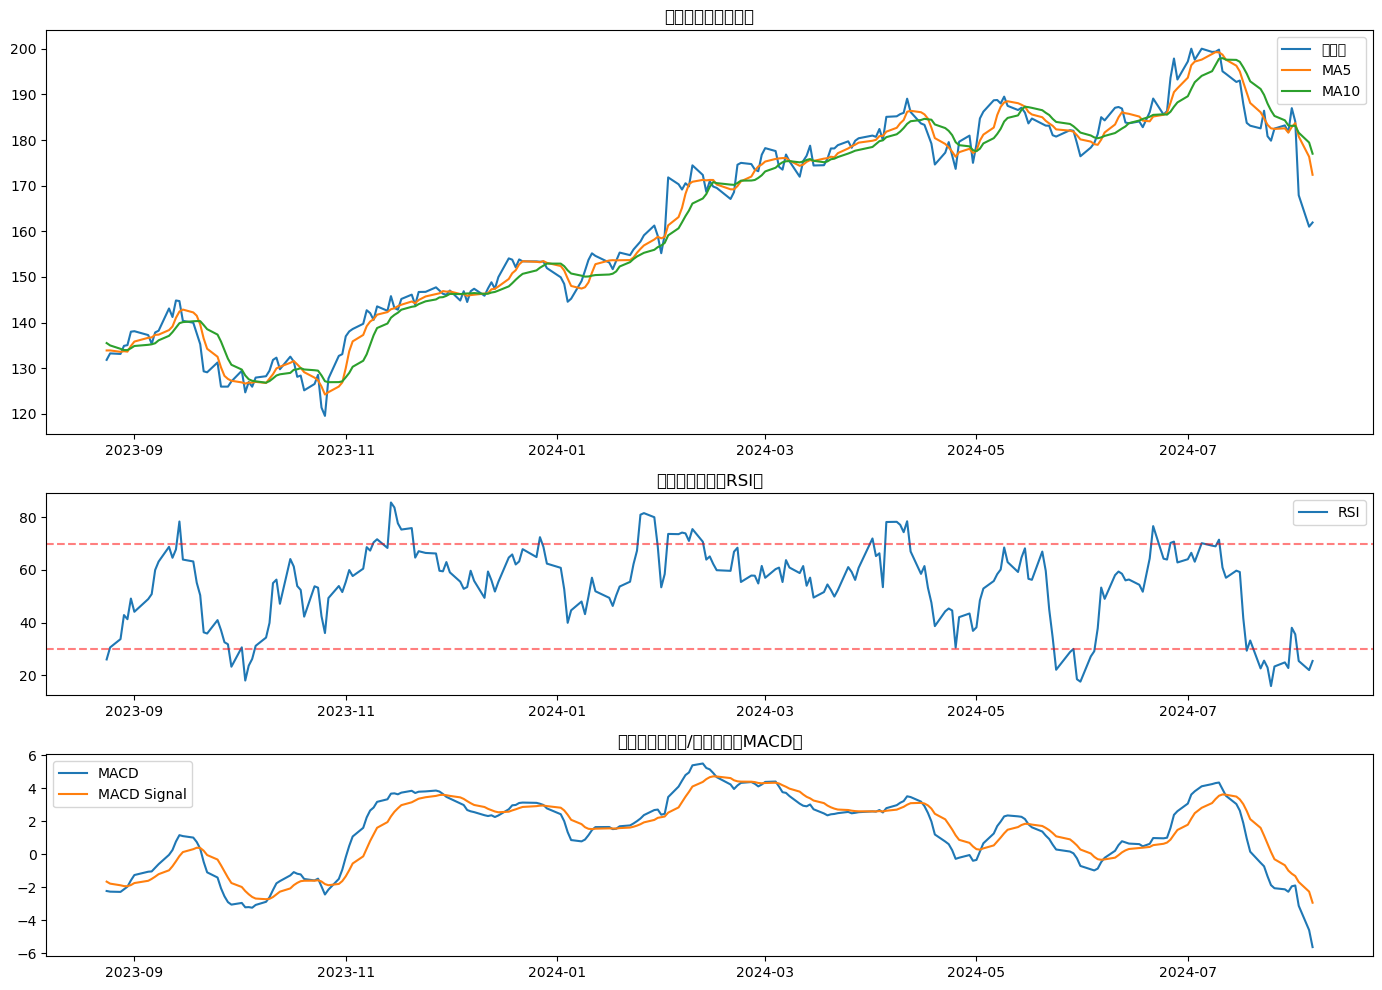

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['MA5'][i] > data['MA10'][i] and data['MA5'][i-1] <= data['MA10'][i-1]:
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['MA5'][i] < data['MA10'][i] and data['MA5'][i-1] >= data['MA10'][i-1]:
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

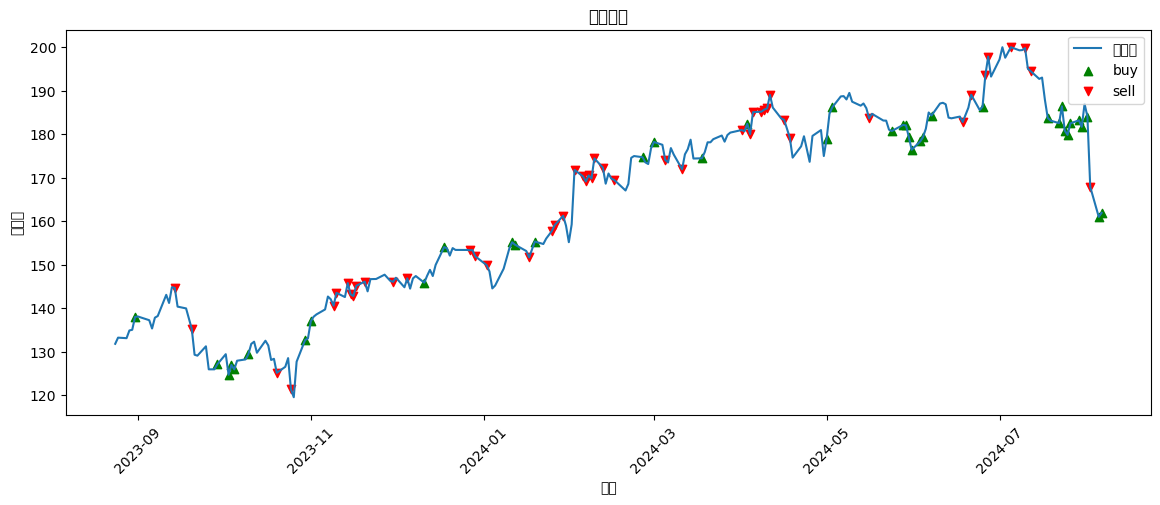

交易日志:
(Timestamp('2023-08-31 00:00:00-0400', tz='America/New_York'), '买入', 100, 138.00999450683594)
(Timestamp('2023-09-14 00:00:00-0400', tz='America/New_York'), '卖出', 100, 144.72000122070312)
(Timestamp('2023-09-29 00:00:00-0400', tz='America/New_York'), '买入', 100, 127.12000274658203)
(Timestamp('2023-10-03 00:00:00-0400', tz='America/New_York'), '买入', 100, 124.72000122070312)
(Timestamp('2023-10-04 00:00:00-0400', tz='America/New_York'), '买入', 100, 127.0)
(Timestamp('2023-10-05 00:00:00-0400', tz='America/New_York'), '买入', 100, 125.95999908447266)
(Timestamp('2023-10-10 00:00:00-0400', tz='America/New_York'), '买入', 100, 129.47999572753906)
(Timestamp('2023-10-20 00:00:00-0400', tz='America/New_York'), '卖出', 100, 125.16999816894531)
(Timestamp('2023-10-25 00:00:00-0400', tz='America/New_York'), '卖出', 100, 121.38999938964844)
(Timestamp('2023-10-30 00:00:00-0400', tz='America/New_York'), '买入', 100, 132.7100067138672)
(Timestamp('2023-11-01 00:00:00-0400', tz='America/New_York'), '买入',

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if balance >= 100 * data['Close'][i]:
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  balance -= 100 * data['Close'][i]
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53718/3267598657.py:127: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 获取股票数据
def get_stock_data(stock_code):
    stock = yf.Ticker(stock_code)
    data = stock.history(period='1y')
    return data

# 计算技术指标
def add_technical_indicators(data):
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['RSI'] = compute_rsi(data['Close'], 14)
    data['MACD'], data['MACD_signal'] = compute_macd(data['Close'])
    data = data.dropna()
    return data

# 计算相对强弱指数（RSI）
def compute_rsi(series, period):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 计算移动平均线收敛/发散指标（MACD）
def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 预处理数据
def preprocess_data(data):
    data = add_technical_indicators(data)
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    data = data.dropna()
    features = data[['Open', 'High', 'Low', 'Close', 'MA5', 'MA10', 'RSI', 'MACD', 'MACD_signal']]
    target = data['Target']
    return features, target, data

# 绘制技术指标图像
def plot_technical_indicators(data):
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(3, 1, height_ratios=[2, 1, 1])
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(data.index, data['Close'], label='收盘价')
    ax0.plot(data.index, data['MA5'], label='MA5')
    ax0.plot(data.index, data['MA10'], label='MA10')
    ax0.set_title('收盘价与移动平均线')
    ax0.legend()
    
    ax1 = plt.subplot(gs[1], sharex=ax0)
    ax1.plot(data.index, data['RSI'], label='RSI')
    ax1.axhline(70, linestyle='--', alpha=0.5, color='r')
    ax1.axhline(30, linestyle='--', alpha=0.5, color='r')
    ax1.set_title('相对强弱指数（RSI）')
    ax1.legend()

    ax2 = plt.subplot(gs[2], sharex=ax0)
    ax2.plot(data.index, data['MACD'], label='MACD')
    ax2.plot(data.index, data['MACD_signal'], label='MACD Signal')
    ax2.set_title('移动平均线收敛/发散指标（MACD）')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 绘制交易信号
def plot_signals(data, buy_signals, sell_signals):
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(data.index, data['Close'], label='收盘价')
    
    ax.scatter(data.index[buy_signals], data['Close'][buy_signals], marker='^', color='g', label='buy', alpha=1)
    ax.scatter(data.index[sell_signals], data['Close'][sell_signals], marker='v', color='r', label='sell', alpha=1)
    
    ax.set_title('交易信号')
    ax.set_xlabel('日期')
    ax.set_ylabel('收盘价')
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

# 交易信号
def generate_signals(data):
    buy_signals = []
    sell_signals = []
    
    for i in range(1, len(data)):
        if data['MA5'][i] > data['MA10'][i] and data['MA5'][i-1] <= data['MA10'][i-1]:
            buy_signals.append(i)
        elif data['MA5'][i] < data['MA10'][i] and data['MA5'][i-1] >= data['MA10'][i-1]:
            sell_signals.append(i)
        elif data['RSI'][i] < 30:
            buy_signals.append(i)
        elif data['RSI'][i] > 70:
            sell_signals.append(i)
        elif data['MACD'][i] > data['MACD_signal'][i] and data['MACD'][i-1] <= data['MACD_signal'][i-1]:
            buy_signals.append(i)
        elif data['MACD'][i] < data['MACD_signal'][i] and data['MACD'][i-1] >= data['MACD_signal'][i-1]:
            sell_signals.append(i)
    
    return buy_signals, sell_signals

# 模拟交易
def simulate_trading(data, buy_signals, sell_signals):
    initial_balance = 100000  # 初始资金
    balance = initial_balance
    shares = 0
    trade_log = []

    for i in range(len(data)):
        if i in buy_signals:
            if balance >= 100 * data['Close'][i]:
                shares += 100
                balance -= 100 * data['Close'][i]
                trade_log.append((data.index[i], '买入', 100, data['Close'][i]))
        elif i in sell_signals:
            if shares >= 100:
                shares -= 100
                balance += 100 * data['Close'][i]
                trade_log.append((data.index[i], '卖出', 100, data['Close'][i]))

    # 计算最终余额
    final_balance = balance + shares * data['Close'].iloc[-1]
    profit = final_balance - initial_balance
    return trade_log, final_balance, profit

def main(stock_code):
    data = get_stock_data(stock_code)
    features, target, full_data = preprocess_data(data)

    # 分割训练集和测试集
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

    # 创建XGBoost模型
    model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    model.fit(x_train, y_train)

    # 进行预测
    predictions = model.predict(x_test)

    # 绘制技术指标图像
    plot_technical_indicators(full_data)

    # 生成并绘制交易信号
    buy_signals, sell_signals = generate_signals(full_data)
    plot_signals(full_data, buy_signals, sell_signals)

    # 模拟交易
    trade_log, final_balance, profit = simulate_trading(full_data, buy_signals, sell_signals)

    # 打印交易日志和盈利状况
    print("交易日志:")
    for log in trade_log:
        print(log)
    print(f"最终余额: {final_balance}")
    print(f"总盈利: {profit}")

if __name__ == '__main__':
    stock_code = input("请输入股票代码: ")
    main(stock_code)